In [28]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.model_selection import ShuffleSplit



#Scaling 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer


In [29]:
def getdf():
    df=pd.read_csv('dataset/train.csv',index_col='Index')
#     df=df.drop(['Unnamed: 0'],axis=1)
    df=df.dropna()
    return df

In [30]:
df=getdf()
def rstr(df): return df.apply(lambda x: [x.unique()])
rstr(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623759 entries, 0 to 623816
Data columns (total 16 columns):
Market    623759 non-null int64
Day       623759 non-null int64
Stock     623759 non-null int64
x0        623759 non-null float64
x1        623759 non-null float64
x2        623759 non-null float64
x3A       623759 non-null float64
x3B       623759 non-null float64
x3C       623759 non-null float64
x3D       623759 non-null float64
x3E       623759 non-null float64
x4        623759 non-null float64
x5        623759 non-null float64
x6        623759 non-null float64
y         623759 non-null float64
Weight    623759 non-null float64
dtypes: float64(13), int64(3)
memory usage: 80.9 MB


In [31]:
trainingSet, testSet = train_test_split(df, test_size=0.2,shuffle=True)
print(len(trainingSet))
print(len(testSet))
trainingSet.to_csv("dataset/new_train.csv", sep=',')
testSet.to_csv("dataset/new_test.csv", sep=',')

499007
124752


In [32]:
print(len(df['x0'].unique()))
df['x0'].unique()


623592


array([ 0.00269645,  0.08109336,  0.00956137, ...,  0.00170255,
        0.01144428,  0.06393639])

In [33]:
df.describe()

,Market,Day,Stock,x0,x1,x2,x3A,x3B,x3C,x3D,x3E,x4,x5,x6,y,Weight
count,623759.000000,623759.000000,623759.000000,6.237590e+05,623759.000000,623759.000000,6.237590e+05,6.237590e+05,623759.000000,623759.000000,623759.000000,623759.000000,6.237590e+05,623759.000000,623759.000000,623759.000000
mean,2.611913,343.903639,1504.306001,3.513748e+01,1.515301,0.975561,3.557139e-06,7.627938e-06,0.000013,0.000020,0.000033,0.001771,5.174833e-06,275.418021,0.000075,14.724577
std,0.816083,209.627612,874.558498,7.673991e+03,4.594348,2.498508,5.574058e-05,1.101604e-04,0.000195,0.000355,0.000583,0.002311,7.393417e-05,1799.924246,0.001046,24.391542
min,1.000000,1.000000,0.000000,0.000000e+00,0.000013,0.000313,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000005,0.000000e+00,1.000000,-0.071099,0.002797
25%,2.000000,161.000000,746.000000,2.038669e-03,0.701934,0.392666,2.262452e-07,6.103653e-07,0.000001,0.000002,0.000004,0.000544,1.501736e-07,100.000000,-0.000107,2.272081
50%,3.000000,334.000000,1508.000000,1.095873e-02,1.040782,0.625397,6.903001e-07,1.788994e-06,0.000003,0.000006,0.000010,0.001056,5.695277e-07,100.000000,0.000027,6.145415
75%,3.000000,518.000000,2264.000000,4.378570e-02,1.650992,0.992100,2.354804e-06,5.704627e-06,0.000010,0.000016,0.000027,0.002130,2.337445e-06,200.000000,0.000203,16.652470
max,4.000000,729.000000,3022.000000,4.998275e+06,2946.263900,677.912473,2.831509e-02,6.514162e-02,0.109440,0.206560,0.361169,0.102200,2.218211e-02,734914.404967,0.066617,694.001930


In [34]:
df=df.sort_values(by=['Day','Market','Stock'])
df.head(100)

,Market,Day,Stock,x0,x1,x2,x3A,x3B,x3C,x3D,x3E,x4,x5,x6,y,Weight
Index,,,,,,,,,,,,,,,,
155,1,1,10,0.015405,0.546394,0.492828,4.942061e-08,1.418661e-07,2.938473e-07,5.243638e-07,1.040828e-06,0.000287,3.494789e-08,205.968015,0.000101,37.109810
157,1,1,12,0.005828,0.534115,0.391960,1.010713e-07,2.906329e-07,5.558849e-07,1.054579e-06,2.974194e-06,0.000369,2.937158e-08,170.786494,-0.000028,15.014850
85,1,1,15,0.000847,0.429354,0.292225,3.241896e-07,1.119926e-06,2.374847e-06,4.091181e-06,3.683309e-06,0.001175,1.117300e-07,115.216234,0.000295,5.296184
130,1,1,20,0.009568,0.529887,0.642264,2.715108e-07,8.424473e-07,1.739159e-06,3.026351e-06,6.305115e-06,0.000562,7.413104e-08,100.112831,0.000272,10.055895
135,1,1,22,0.060166,0.888481,0.236378,2.890282e-06,3.759807e-06,2.858839e-06,3.814081e-06,3.814081e-06,0.006380,1.097446e-05,100.000000,0.002172,1.375876
146,1,1,29,0.001862,0.678710,0.539533,2.237837e-06,1.007676e-05,1.056598e-05,1.594486e-05,2.094167e-05,0.000707,1.850936e-07,100.000000,0.000308,2.604613
243,1,1,42,0.000219,0.411590,0.394164,4.390448e-06,1.268969e-05,2.085830e-05,3.332045e-05,3.722046e-05,0.004211,2.017520e-06,210.091133,0.000945,2.508284
194,1,1,48,0.033858,0.674021,0.653132,2.634388e-07,8.646051e-07,1.882701e-06,3.694836e-06,1.002418e-05,0.000778,4.347356e-07,100.000000,0.000183,8.763009
254,1,1,60,0.056458,0.460894,0.424630,1.563925e-05,4.488160e-05,8.250675e-05,1.674051e-04,4.276524e-04,0.003756,4.005472e-06,100.000000,-0.006000,1.083844


In [35]:
print('Number of rows: {}, Number of columns: {}'.format(*df.shape))

Number of rows: 623759, Number of columns: 16


### Adding Features to make it into a time series

In [36]:
### idea here is to extract the date elements from the dataset.

def addfeatures(df): 
    df['Date'] = pd.to_datetime("'2015-10-01'") # assumption
    df['Date'] = df['Date'] + df['Day'].map(timedelta) - timedelta(days=1)
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.weekofyear
    df['Weekday'] = df['Date'].dt.weekday
    df['DayMonth'] = df['Date'].dt.day
    df=df.drop(['Date'],axis=1)
    return df

So here we are trying to create a a time series with this data hopefully this should generate some more insights on this. we added the year, week of the year,weekday and day from just the day field in the dataset.

In [37]:
df=getdf()
df=addfeatures(df)
df.sample(10)

,Market,Day,Stock,x0,x1,x2,x3A,x3B,x3C,x3D,...,x4,x5,x6,y,Weight,Year,Month,Week,Weekday,DayMonth
Index,,,,,,,,,,,,,,,,,,,,,
338859,3,244,569,0.003988,6.703249,2.682815,2.082576e-07,4.332416e-07,6.986208e-07,1.288327e-06,...,0.000517,1.470228e-07,100.000000,0.000011,8.904952,2016,5,22,1,31
194158,2,716,2527,0.000489,2.624973,1.080666,1.587268e-07,5.298254e-07,1.247326e-06,2.355750e-06,...,0.000393,7.457623e-08,810.754583,-0.000134,23.566266,2017,9,37,4,15
491690,3,533,1526,0.001632,0.746801,0.676325,7.078225e-07,1.124863e-06,1.493128e-06,2.499388e-06,...,0.001162,2.641993e-07,100.000000,-0.000129,3.250287,2017,3,11,3,16
475720,3,497,1891,0.028664,7.681601,0.889686,2.563121e-06,8.312149e-06,2.045664e-05,3.969723e-05,...,0.002566,1.631127e-06,100.000000,0.001197,1.382551,2017,2,6,2,8
519981,3,607,1197,0.093989,1.039000,0.688054,1.312851e-06,3.334737e-06,5.984645e-06,1.311010e-05,...,0.001040,2.895802e-06,100.000000,-0.000049,7.994325,2017,5,22,0,29
133906,2,267,976,0.000352,0.823751,0.381129,1.015953e-06,2.692362e-06,6.155705e-06,1.004455e-05,...,0.001242,6.350273e-07,220.000000,-0.000207,2.078788,2016,6,25,3,23
406715,3,378,1078,0.427695,0.951947,1.208742,3.116844e-05,1.092901e-04,2.350730e-04,3.267056e-04,...,0.004678,3.758087e-05,100.000000,-0.003604,1.202347,2016,10,41,2,12
114440,2,153,1239,0.071198,2.285237,0.978328,4.519669e-07,1.898104e-06,3.912890e-06,6.028753e-06,...,0.001116,6.246197e-07,179.837673,0.000253,29.856868,2016,3,9,1,1
267183,3,125,266,0.008011,0.566299,0.274979,2.905864e-07,7.537555e-07,1.427069e-06,2.775654e-06,...,0.000451,1.398069e-07,124.387273,0.000185,13.864329,2016,2,5,1,2


In [38]:
df.isnull().sum()

Market      0
Day         0
Stock       0
x0          0
x1          0
x2          0
x3A         0
x3B         0
x3C         0
x3D         0
x3E         0
x4          0
x5          0
x6          0
y           0
Weight      0
Year        0
Month       0
Week        0
Weekday     0
DayMonth    0
dtype: int64

Visualizing the Data. 

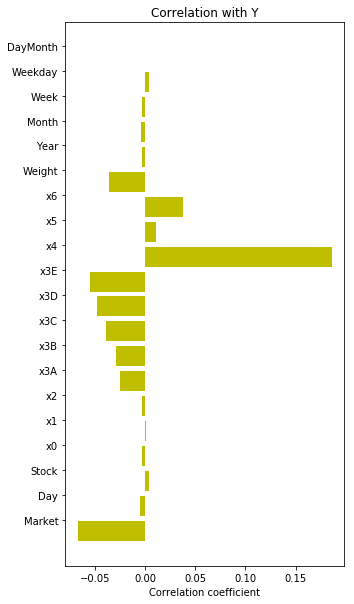

In [39]:
x_cols = [col for col in df.columns  if col not in ['id','Date','y']]
# x_cols

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(df[col].values, df.y.values)[0,1])

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(5,10))
rects = ax.barh(ind, np.array(values), color='y')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation with Y")
plt.show()

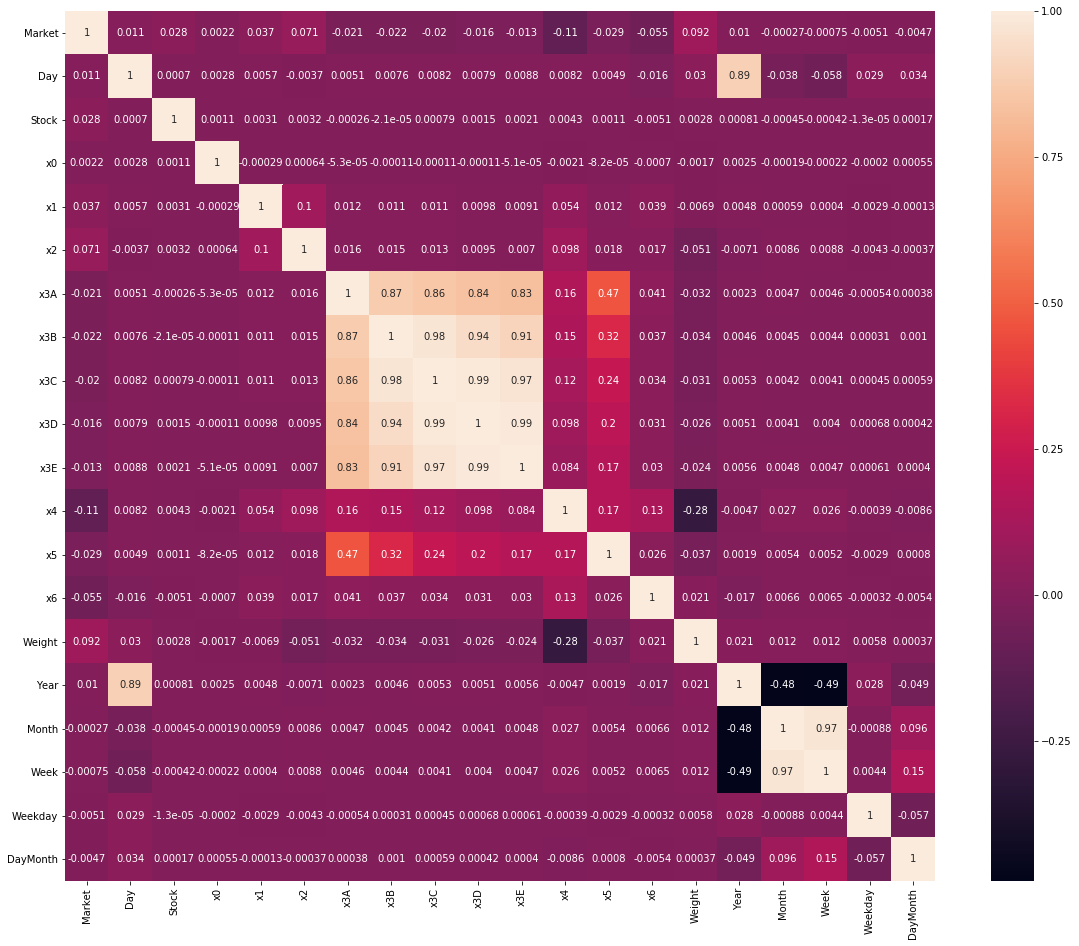

In [40]:
corrmat = df[x_cols].corr(method='pearson')
f, ax = plt.subplots(figsize=(20, 16))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1, square=True,annot=True)
plt.show()

There is high corelation or some relationship with X3 features and X4,X5. lets test this using Variance Inflation Factor for X3 features for X4,X5

In [41]:
df_vif = df[['x3A','x3B','x3C','x3D','x3E','x4','x5']]

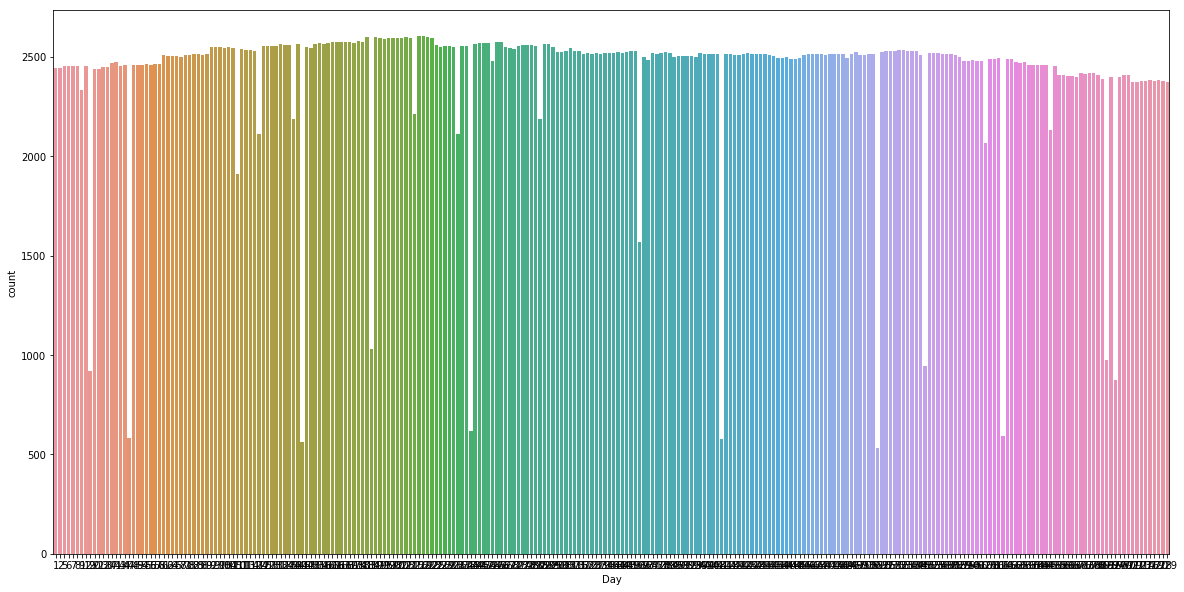

In [42]:
f, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x='Day', data=df)
plt.show()


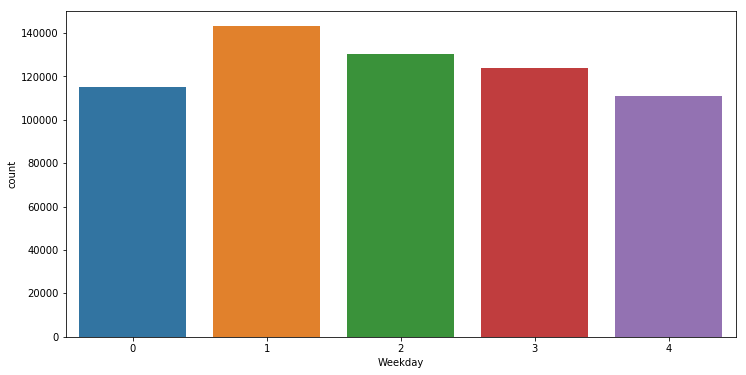

In [43]:
f, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x='Weekday', data=df)
plt.show()

So here we have our 5 weekdays. incidently we have more Tuesdays than other days. 

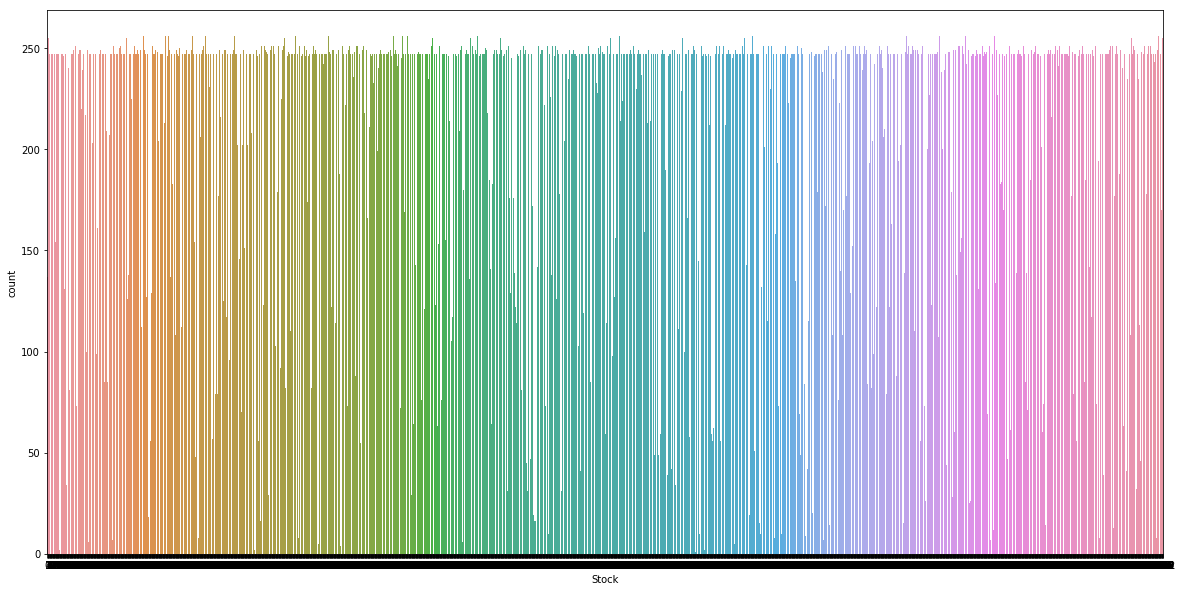

In [44]:
f, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x='Stock', data=df)
plt.show()

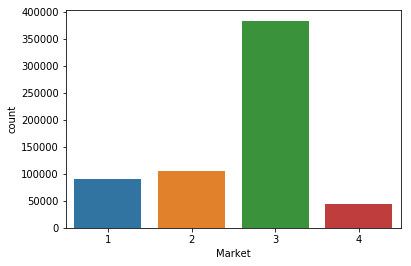

In [45]:
f, ax = plt.subplots()
sns.countplot(x='Market', data=df)
plt.show()

In [46]:
df_temp=pd.pivot_table(data=df,index='Market',columns='Weekday',values='Stock',aggfunc=lambda x: len(x.unique()))
df_temp

Weekday,0,1,2,3,4
Market,,,,,
1,451,452,451,452,452
2,538,543,539,544,543
3,1785,1787,1791,1792,1785
4,230,230,231,231,230


In [47]:
df_temp=pd.pivot_table(data=df,index='Stock',columns='Weekday',values='Market',aggfunc=lambda x: len(x.unique()))
df_temp

Weekday,0,1,2,3,4
Stock,,,,,
0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0


In [48]:
df_temp=pd.pivot_table(data=df,index='Market',columns='Weekday',values='Day',aggfunc=lambda x: len(x.unique()))
df_temp

Weekday,0,1,2,3,4
Market,,,,,
1,45,57,52,50,45
2,47,57,52,50,45
3,46,57,52,49,44
4,52,57,52,50,45


In [49]:
df_temp=pd.pivot_table(data=df,index='Weekday',values='Day',aggfunc=lambda x: len(x.unique()))
df_temp

,Day
Weekday,
0,53
1,57
2,52
3,50
4,46


In [50]:
df_temp=pd.pivot_table(data=df,index='Market',columns='Weekday',values='Day',aggfunc=lambda x: len(x.unique()))
df_temp

Weekday,0,1,2,3,4
Market,,,,,
1,45,57,52,50,45
2,47,57,52,50,45
3,46,57,52,49,44
4,52,57,52,50,45


### Scaling the data

In [51]:
def scaling(type_,x):
    if type_=='minmax':
        scaler = MinMaxScaler()
    elif type_=='standard':
        scaler = StandardScaler()
    elif type_=='maxabs':
        scaler= MaxAbsScaler()
    elif type_=='robust':
        scaler= RobustScaler()
    elif type_=='QuantileTransformer':
        scaler=QuantileTransformer()
    elif type_=='Normalizer':
        scaler=Normalizer()
    x=scaler.fit_transform(x)
    return x

In [52]:
df=getdf()
df=addfeatures(df) ### add weekday column based on the day column
df[['x0','x1','x2','x3A','x3B','x3C','x3D','x3E','x4','x5','x6']]=scaling('standard',df[['x0','x1','x2','x3A','x3B','x3C','x3D','x3E','x4','x5','x6']])
x_train, x_test, y_train, y_test = train_test_split(df.drop(['y',],axis=1),df['y'],test_size=0.20)
x_train_weight=x_train['Weight']
x_test_weight=x_test['Weight']
x_train=x_train.drop(['Weight'], axis=1)
x_test=x_test.drop(['Weight'], axis=1)

In [56]:
mylist=[LinearRegression(),Ridge(),Lasso(),KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),RandomForestRegressor()]
nameList=["Linear Regression","Ridge Linear Regression","Lasso Regression","KNeighborsRegressor","Support Vector Regression","Decision Tree Regression","Random Forest Regression"]
count=0
for item in mylist:
    eqn=item
    eqn.fit(x_train,y_train)
    y_pred_train = eqn.predict(x_train)
    y_pred_test = eqn.predict(x_test)
    rmse_train = mean_squared_error(y_train,y_pred_train)
    rmse_test = mean_squared_error(y_test,y_pred_test)
  
    print("***",nameList[count],"***")
    print("RMSE for training data:", rmse_train)
    print("RMSE for test data:", rmse_test)
    print("R2 Score for training:",r2_score(y_train, y_pred_train))
    print("R2 Score for test:",r2_score(y_test, y_pred_test))
    print("Model Score :",eqn.score(x_train,y_train))
    count+=1
    print()

*** Linear Regression ***
RMSE for training data: 1.05501827144e-06
RMSE for test data: 1.01418411431e-06
R2 Score for training: 0.0435416197658
R2 Score for test: 0.0414910997194
Model Score : 0.0435416197658

*** Ridge Linear Regression ***
RMSE for training data: 1.05501827294e-06
RMSE for test data: 1.01418369714e-06
R2 Score for training: 0.0435416184048
R2 Score for test: 0.0414914939939
Model Score : 0.0435416184048

*** Lasso Regression ***
RMSE for training data: 1.10304671196e-06
RMSE for test data: 1.05808593428e-06
R2 Score for training: 0.0
R2 Score for test: -6.61576127436e-07
Model Score : 0.0

*** KNeighborsRegressor ***
RMSE for training data: 7.49688695232e-07
RMSE for test data: 1.10528770745e-06
R2 Score for training: 0.320347282572
R2 Score for test: -0.0446112200034
Model Score : 0.320347282572

*** Support Vector Regression ***
RMSE for training data: 9.89853985114e-06
RMSE for test data: 9.8585416856e-06
R2 Score for training: -7.97381746742
R2 Score for test: -

### Basic Simple model with one variable

In [ ]:
df=getdf()
df[['x0','x1','x2','x3A','x3B','x3C','x3D','x3E','x4','x5','x6','y']]=scaling('standard',df[['x0','x1','x2','x3A','x3B','x3C','x3D','x3E','x4','x5','x6','y']])
x=df[['x4']]
y=df['y']
model=LinearRegression()

model.fit(x, y)
y_pred = model.predict(x)

print('alpha:  \t', model.intercept_)
print('beta:   \t', model.coef_[0])

print('r^2 score:\t', model.score(x, y))
rmse= round(mean_squared_error(y,y_pred,sample_weight=df[['Weight']]),4)
print("RMSE:",rmse)




### Attempt trying to minimize the RMSE error to a minimum


In [28]:
df=getdf()
df[['x0','x1','x2','x3A','x3B','x3C','x3D','x3E','x4','x5','x6','y']]=scaling('robust',df[['x0','x1','x2','x3A','x3B','x3C','x3D','x3E','x4','x5','x6','y']])
df=df[['x4','y','Weight']]
x_train, x_test, y_train, y_test = train_test_split(df.drop(['y'],axis=1),df['y'],test_size=0.20)
model=LinearRegression()

model.fit(x_train.drop(['Weight'],axis=1), y_train)
y_pred = model.predict(x_test.drop(['Weight'],axis=1))

print('r^2 score:\t', model.score(x_train.drop(['Weight'],axis=1), y_train))
wmse= round(mean_squared_error(y_pred,y_test,sample_weight=x_test[['Weight']]),4)
print("WMSE:",wmse)

r^2 score:	 0.033067292934
WMSE: 1.0269


Result :